<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/205_discr_rv_distr.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(discr_distr_notebook)=
# Distribuzioni di v.c. discrete

Questo capitolo è dedicato a un'approfondita esplorazione delle distribuzioni di probabilità discrete, 
che sono fondamentali per analizzare e modellare una vasta gamma di fenomeni casuali, in cui gli esiti sono chiaramente definiti e numerabili. Inizieremo con la distribuzione Bernoulliana, che rappresenta esperimenti con due possibili esiti - un "successo" o un "insuccesso". Questi esperimenti sono il nucleo di ciò che viene definito un processo Bernoulliano. Quando tali prove Bernoulliane vengono ripetute per un numero fisso di volte $n$, il conteggio totale dei successi segue una distribuzione binomiale.

Questa distribuzione binomiale nasce dalla somma di prove Bernoulliane indipendenti, ma solo quando il numero totale di prove $n$ è stabilito in anticipo. Se, invece, il numero stesso di prove diventa una variabile casuale, la distribuzione dei successi all'interno di questa serie di prove segue la distribuzione di Poisson, che si presta a modellare eventi che avvengono raramente o su intervalli variabili.

D'altra parte, se la probabilità di successo in una serie di prove Bernoulliane non è costante, ma varia seguendo una distribuzione Beta, allora il numero di successi osservati in $N$ prove non si conformerà più alla distribuzione binomiale, ma seguirà invece la distribuzione Beta-Binomiale. Quest'ultima offre una rappresentazione più flessibile e aderente alla realtà in certi contesti.

Infine, esamineremo la distribuzione discreta uniforme, dove ogni evento all'interno di un determinato intervallo finito ha la stessa probabilità di verificarsi. Questa distribuzione è particolarmente utile quando non esistono motivi per privilegiare un risultato rispetto a un altro.

Attraverso questo capitolo, ci proponiamo di fornire una comprensione chiara e approfondita di queste distribuzioni, mettendo in luce le loro applicazioni e la loro rilevanza nell'analisi statistica.

## Preparazione del Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import arviz as az
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

## Distribuzione Bernoulliana

In statistica, un esperimento che presenta soltanto due esiti possibili viene modellato attraverso ciò che è noto come "prova Bernoulliana". Un esempio classico è il lancio di una moneta, che può risultare in testa o croce.

```{admonition} Definizione
Una variabile casuale $Y$ che assume valori in $\{0, 1\}$ è definita come variabile di Bernoulli. La sua distribuzione di probabilità è descritta come segue:

$$
P(Y \mid \theta) =
  \begin{cases}
    \theta     & \text{se $Y = 1$ (successo)}, \\
    1 - \theta & \text{se $Y = 0$ (insuccesso)},
  \end{cases}
$$

dove $0 \leq \theta \leq 1$. Il parametro $\theta$ rappresenta la probabilità dell'evento "successo" ($Y = 1$), mentre $1 - \theta$ quella dell'evento "insuccesso" ($Y = 0$).
```

Nella distribuzione Bernoulliana, la probabilità di osservare l'esito 1 è $\theta$, mentre quella di osservare 0 è $1 - \theta$. Questa distribuzione viene utilizzata per modellare situazioni in cui esistono due sole possibili risposte, come un "sì" o un "no", un "successo" o un "insuccesso".

Calcolando il valore atteso e la varianza, otteniamo:

$$
\begin{align}
\mathbb{E}(Y) &= 0 \cdot P(Y=0) + 1 \cdot P(Y=1) = \theta, \\
\mathbb{V}(Y) &= (0 - \theta)^2 \cdot P(Y=0) + (1 - \theta)^2 \cdot P(Y=1) = \theta(1-\theta).
\end{align}
$$ (eq-ev-var-bern)

Utilizziamo la notazione $Y \sim Bernoulli(\theta)$ per indicare che la variabile casuale $Y$ segue una distribuzione Bernoulliana con parametro $\theta$.

Ad esempio, nel caso del lancio di una moneta equilibrata, la variabile di Bernoulli assume i valori $0$ e $1$ con uguale probabilità di $\frac{1}{2}$. Pertanto, la funzione di massa di probabilità assegna una probabilità di $\frac{1}{2}$ sia per $Y = 0$ che per $Y = 1$, mentre la funzione di distribuzione cumulativa risulta essere $\frac{1}{2}$ per $Y = 0$ e $1$ per $Y = 1$.

Questo approccio ci permette di comprendere e modellare fenomeni binari semplici in una vasta gamma di applicazioni pratiche.

## Distribuzione Binomiale

La distribuzione binomiale è una distribuzione di probabilità discreta fondamentale, che si concentra sul conteggio del numero di successi in una serie di prove Bernoulliane indipendenti. Queste prove sono caratterizzate dal fatto che ogni evento ha solo due possibili esiti: "successo" o "insuccesso", con una probabilità di successo costante denotata da $\theta$.

```{admonition} Definizione
La distribuzione binomiale quantifica la probabilità di osservare esattamente $y$ successi in $n$ tentativi indipendenti di Bernoulli:

$$
P(Y=y) = \binom{n}{y} \theta^{y} (1-\theta)^{n-y} = \frac{n!}{y!(n-y)!} \theta^{y} (1-\theta)^{n-y},
$$ (eq-binomialdistribution)

Qui, $\binom{n}{y}$, noto come coefficiente binomiale, rappresenta il numero di combinazioni possibili per ottenere $y$ successi in $n$ prove, mentre $\theta$ è la probabilità costante di successo per ogni prova.
```

La distribuzione binomiale è spesso illustrata con esempi come il lancio di una moneta o l'estrazione da un'urna. Ad esempio, nel caso del lancio ripetuto di una moneta, questa distribuzione descrive la probabilità di ottenere un numero specifico di teste in un certo numero di lanci, con ciascun lancio che segue una distribuzione di Bernoulli con probabilità di successo $\theta$.

Un aspetto interessante della distribuzione binomiale è la sua proprietà di riproducibilità: se due variabili casuali indipendenti, $y_1$ e $y_2$, seguono distribuzioni binomiali con lo stesso parametro $\theta$, ma con diversi numeri di prove ($N_1$ e $N_2$), allora la loro somma, $y = y_1 + y_2$, sarà anch'essa distribuita binomialmente, con parametri $N_1 + N_2$ e $\theta$.

### Calcolo delle Probabilità

Per approfondire il calcolo delle probabilità in questa distribuzione, esaminiamo una serie di prove Bernoulliane. Consideriamo una serie di $n$ prove che risultano in $y$ successi:

$$
\overbrace{SS\dots S}^\text{$y$ volte} \overbrace{II\dots I}^\text{$n-y$ volte}
$$

Ogni sequenza con $y$ successi specifici ha una probabilità di $\theta^y \cdot (1-\theta)^{n-y}$. Tuttavia, siamo interessati alla probabilità complessiva di osservare qualsiasi sequenza con $y$ successi, che si ottiene moltiplicando la probabilità di una sequenza singola per il numero totale di sequenze possibili, dato dal coefficiente binomiale $\binom{n}{y}$.

In questo modo, la distribuzione binomiale diventa uno strumento statistico potente per analizzare fenomeni che presentano esiti binari, con prove che sono indipendenti e identicamente distribuite. Questa distribuzione trova applicazione in una moltitudine di scenari, dalla valutazione del numero di successi in una serie di tentativi, come i lanci di moneta, fino a sondaggi di opinione e altro ancora. La sua universalità deriva dalla sua capacità di modellare efficacemente situazioni con esiti binari e dalla sua flessibilità nel gestire variabili $\theta$ e $n$.

### Applicazioni Pratiche della Distribuzione Binomiale

Consideriamo un esempio pratico per illustrare l'applicazione della distribuzione binomiale. Supponiamo di osservare 2 successi in 4 prove Bernoulliane, dove la probabilità di successo in ogni prova è $\theta = 0.2$. La probabilità di ottenere questo risultato specifico è calcolata utilizzando l'eq. {eq}`eq-binomialdistribution`:

$$
P(Y=2) = \frac{4!}{2!(4-2)!} \cdot 0.2^{2} \cdot (1-0.2)^{4-2} = 0.1536.
$$

Questo calcolo può essere replicato in Python. Utilizzando il modulo `math`, possiamo calcolare direttamente:

In [3]:
n = 4
theta = 0.2
y = 2

prob = math.comb(n, y) * theta**y * (1 - theta) ** (n - y)

In alternativa, possiamo sfruttare la libreria SciPy per eseguire calcoli analoghi. SciPy offre una vasta gamma di funzioni per la gestione delle distribuzioni statistiche, tra cui la distribuzione binomiale. Utilizzando `scipy.stats.binom.pmf(y, n, p)`, possiamo trovare le probabilità per ogni possibile valore di $y$ in una distribuzione binomiale di parametri $n = 4$ e $\theta = 0.2$:

In [4]:
y = np.arange(0, n + 1)
probabilities = stats.binom.pmf(y, n, theta)

Visualizziamo la distribuzione di massa di probabilità:

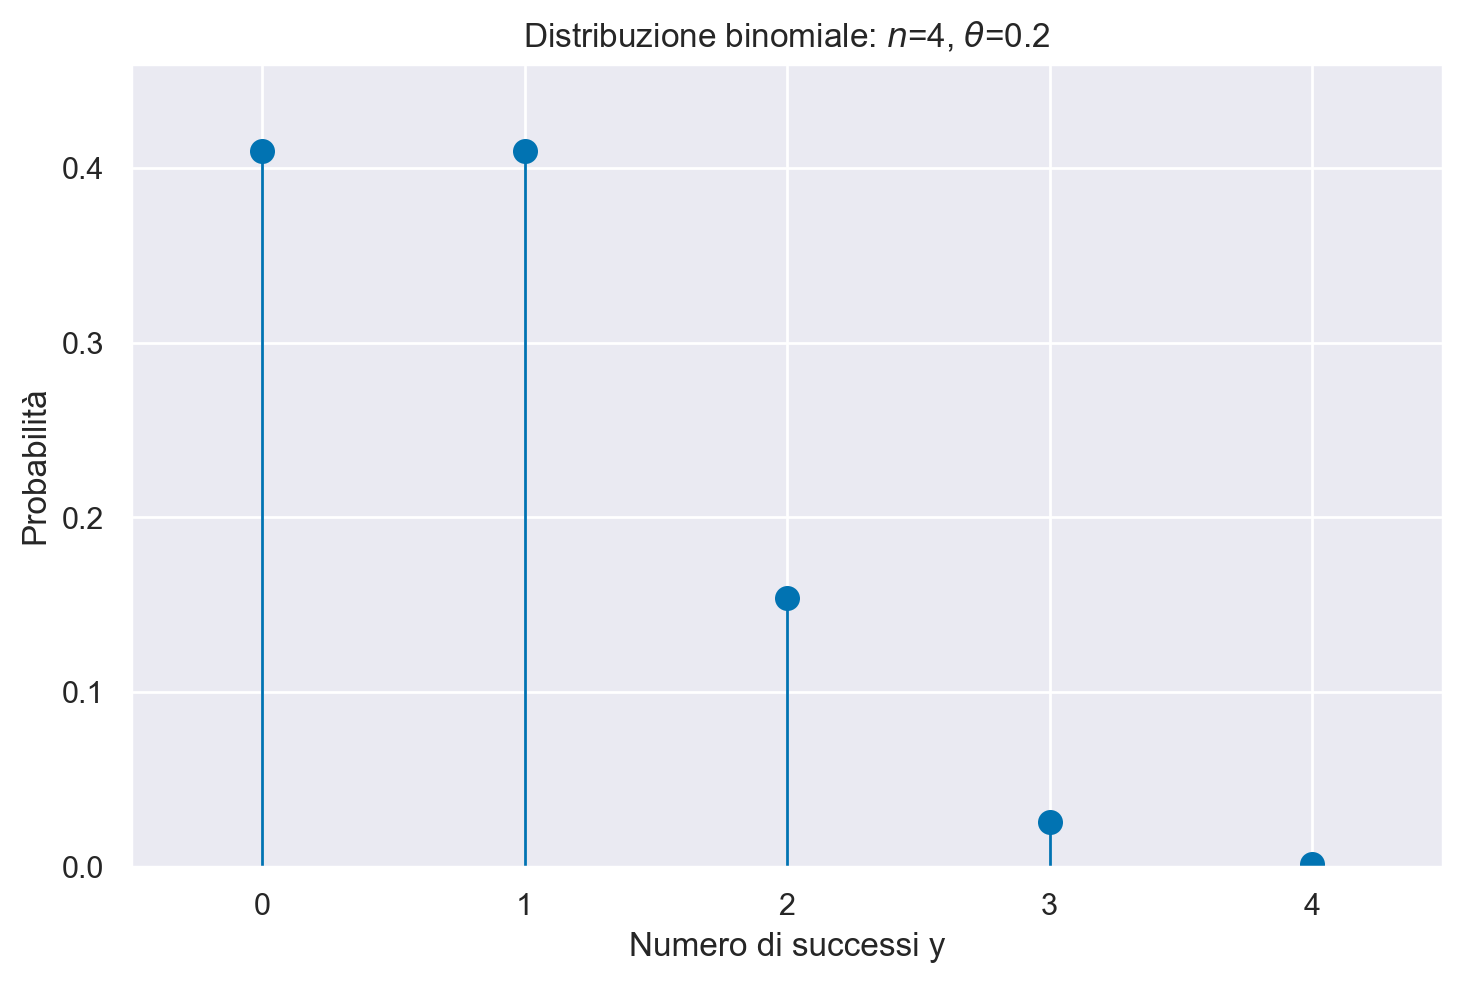

In [5]:
plt.figure()
plt.plot(y, probabilities, "o", ms=8)
plt.vlines(y, 0, probabilities, linestyles="-", lw=1)
plt.title(f"Distribuzione binomiale: $n$={n}, $\\theta$={theta}")
plt.xlabel("Numero di successi y")
plt.ylabel("Probabilità")
plt.xlim(-0.5, n + 0.5)
plt.ylim(0, max(probabilities) + 0.05)
plt.show()

Un'altra proprietà interessante della distribuzione binomiale è la sua riproducibilità. Se abbiamo due variabili casuali indipendenti che seguono distribuzioni binomiali con lo stesso parametro $\theta$ ma con diversi numeri di prove, la loro somma seguirà anch'essa una distribuzione binomiale. Questo può essere dimostrato analiticamente o sperimentato praticamente utilizzando strumenti come Python.

Per esplorare ulteriormente, consideriamo la distribuzione di probabilità di diverse distribuzioni binomiali per due valori di $n$ e $\theta$. La seguente visualizzazione mostra come cambia la distribuzione al variare di $\theta$:

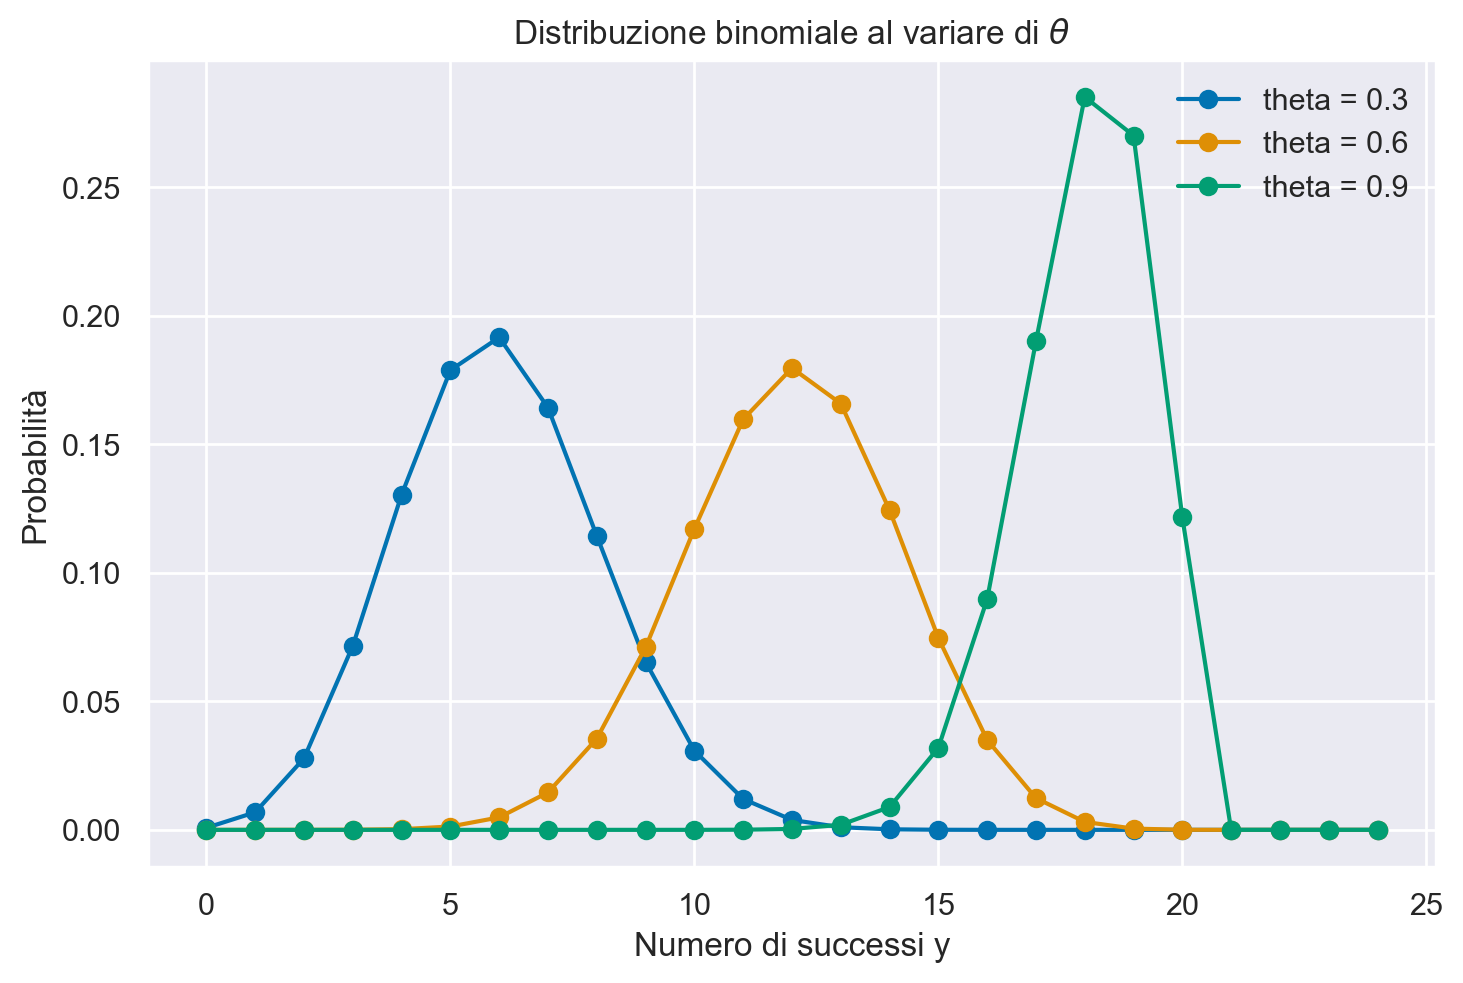

In [8]:
plt.figure()

for theta in np.arange(0.3, 1.0, 0.3):
    y = np.arange(0, 25)
    binom_dist = stats.binom.pmf(y, 20, theta)
    plt.plot(y, binom_dist, "-o", label=f"theta = {theta:.1f}")

plt.xlabel("Numero di successi y")
plt.ylabel("Probabilità")
plt.title("Distribuzione binomiale al variare di $\\theta$")
plt.legend()
plt.show()

Questi esempi dimostrano come la distribuzione binomiale possa essere utilizzata per modellare e analizzare esperimenti con esiti binari in una varietà di contesti reali.

Consideriamo un altro esempio. Lanciando $5$ volte una moneta onesta, qual è la probabilità che esca testa almeno tre volte?

In [9]:
stats.binom.pmf(3, n=5, p=0.5) + stats.binom.pmf(4, n=5, p=0.5) +  stats.binom.pmf(5, n=5, p=0.5)

0.49999999999999983

In [11]:
np.sum([stats.binom.pmf(k, n=5, p=0.5) for k in range(3, 6)])

0.49999999999999983

Più facilmente, si trova la risposta usando la funzione di ripartizione `binom.cdf`.

In [12]:
1 - stats.binom.cdf(2, n=5, p=0.5)

0.5

Rappresentiamo graficamente la funzione di distribuzione per una Binomiale di ordine $n$ = 5 e $\theta$ = 0.5.

Text(0, 0.5, 'Probabilità')

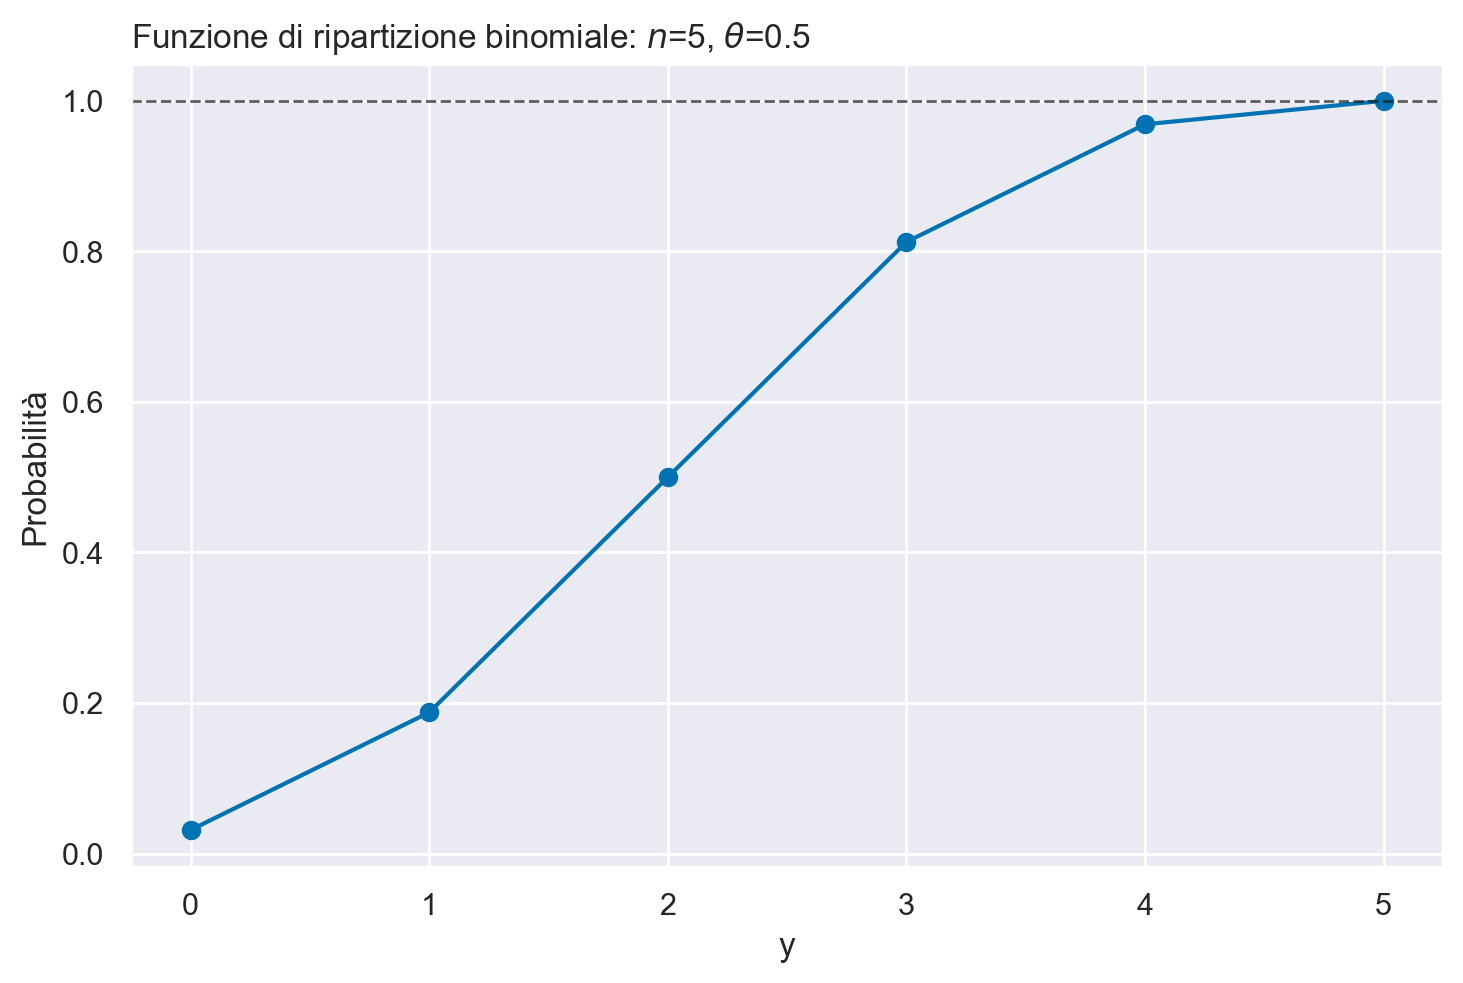

In [10]:
n = 5
theta = 0.5
y = np.arange(0, n+1)

plt.figure()
plt.plot(y, stats.binom.cdf(y, n=n, p=theta))
plt.scatter(y, stats.binom.cdf(y, n=n, p=theta))
plt.axhline(1, color="k", alpha=0.7, linestyle="--", lw=1)
plt.title(f"Funzione di ripartizione binomiale: $n$={n}, $\\theta$={theta}", loc="left")
plt.xlabel("y")
plt.ylabel("Probabilità")

Per generare una sequenza di valori casuali seguendo una distribuzione binomiale, possiamo utilizzare il concetto di una variabile casuale 'frozen' (congelata). Una variabile casuale congelata rappresenta una specifica istanza di una distribuzione di probabilità con parametri fissi. In altre parole, una volta che la variabile casuale è stata definita e i suoi parametri (come il numero di prove e la probabilità di successo in una distribuzione binomiale) sono stati impostati, questi rimangono immutabili.

La creazione di una variabile casuale congelata è utile perché permette di simulare ripetutamente l'esperimento senza la necessità di riconfigurare i parametri ogni volta. Dopo aver definito la variabile casuale con i parametri desiderati, possiamo generare campioni dalla distribuzione associata utilizzando il metodo `rvs()`.

Per esempio, in Python, possiamo creare una variabile casuale binomiale congelata specificando il numero di prove e la probabilità di successo. Una volta creata, possiamo utilizzare il metodo `rvs()` per generare una sequenza di valori casuali che segue la distribuzione binomiale con i parametri specificati. Questo processo facilita la simulazione e l'analisi di esperimenti che seguono un modello binomiale.

In [14]:
n = 5
p = 0.5
rv = stats.binom(n, p)

Generiamo poi 30 realizzazioni della v.c. `rv`: 

In [15]:
x = rv.rvs(30)
print(*x)

4 1 2 1 4 4 2 2 0 2 3 4 5 4 4 0 4 4 3 2 1 3 5 2 2 3 1 1 4 3


Lo stesso risultato si può anche ottenere mediante la funzione `random.binomial()` di NumPy.

In [16]:
x = np.random.binomial(p=.5, n=5, size=30)
print(*x)

4 2 2 4 3 1 2 2 5 3 1 0 3 3 0 4 3 4 3 1 3 3 2 2 4 1 2 1 2 2


### Valore atteso e deviazione standard

La media (numero atteso di successi in $n$ prove) e la deviazione standard di una distribuzione binomiale si trovano nel modo seguente:

$$
\begin{align}
\mu    &= n\theta,  \notag \\
\sigma &= \sqrt{n\theta(1-\theta)}.
\end{align}
$$ (eq-mean-var-binomial)

```{admonition} Dimostrazione
Essendo $Y$ la somma di $n$ prove Bernoulliane indipendenti $Y_i$, è facile vedere che

$$
\begin{align}
\mathbb{E}(Y) &= \mathbb{E}\left( \sum_{i=1}^n Y_i \right) = \sum_{i=1}^n \mathbb{E}(Y_i) = n\theta, \\
\mathbb{V}(Y) &= \mathbb{V} \left( \sum_{i=1}^n Y_i \right) = \sum_{i=1}^n \mathbb{V}(Y_i) = n \theta (1-\theta).
\end{align}
$$
```

Prendiamo in considerazione il caso di un esperimento in cui vengono lanciate quattro monete, ciascuna con una probabilità di ottenere testa (successo) pari a $\theta = 0.2$. Calcoliamo il valore atteso e la varianza per questo esperimento.

Il valore atteso, $\mu$, rappresenta il numero medio di teste che ci aspettiamo di ottenere in ciascun lancio. Per la distribuzione binomiale, questo è dato da $\mu = n \theta$, dove $n$ è il numero di prove (lanci di monete). Nel nostro caso, con $n = 4$ e $\theta = 0.2$, abbiamo:

$$
\mu = n \theta = 4 \times 0.2 = 0.8.
$$

Questo significa che, in media, ci aspettiamo di ottenere circa 0.8 teste per ogni serie di quattro lanci.

Per quanto riguarda la varianza, che misura quanto i risultati individuali tendono a differire dalla media, nella distribuzione binomiale è calcolata come $n \theta (1-\theta)$. Pertanto, per il nostro esperimento:

$$
\text{Varianza} = n \theta (1-\theta) = 4 \times 0.2 \times (1 - 0.2) = 0.64.
$$

La varianza di 0.64 suggerisce una certa dispersione intorno al valore medio di 0.8 teste.

Per confermare queste aspettative teoriche, possiamo eseguire una simulazione computazionale. Creiamo una serie di esperimenti simulati in cui lanciamo quattro monete per un gran numero di volte, registrando il numero di teste ottenute in ogni serie. Calcoliamo poi la media e la varianza dei risultati ottenuti per vedere quanto si avvicinano ai valori teorici calcolati.

In [11]:
n = 4
p = 0.2
rv = stats.binom(n, p)

x = rv.rvs(100000)

In [12]:
np.mean(x)

0.79965

In [20]:
np.var(x, ddof=0)

0.6351865775

## Distribuzione Discreta Uniforme

La distribuzione discreta uniforme è un tipo particolare di distribuzione di probabilità, dove ogni risultato in un insieme finito e discreto $S$ ha la stessa probabilità $p$ di verificarsi. Questa distribuzione è caratterizzata dalla sua semplicità e dalla sua proprietà fondamentale di equiprobabilità.

Consideriamo un esempio pratico con una variabile casuale discreta $X$, che può assumere valori nell'insieme $\{1, 2, \dots, N\}$. Un'istanza classica di questa distribuzione si verifica quando si sceglie casualmente un numero intero tra 1 e $N$, inclusi. Se $X$ rappresenta il numero selezionato, allora la somma delle probabilità di tutti i possibili valori di $X$ deve totalizzare 1, come indicato dalla formula di normalizzazione:

$$
\sum_{i=1}^N P(X_i) = Np = 1.
$$

Di conseguenza, la probabilità che $X$ assuma un valore specifico $x$ è uniformemente distribuita:

$$
P(X = x) = \frac{1}{N},
$$

indicando che ogni evento ha la stessa probabilità di verificarsi.

Il valore atteso, o la media, di $X$ ci dà un'idea del risultato medio atteso e si calcola come:

$$
\mathbb{E}(X) = \sum_{x=1}^N x \cdot \frac{1}{N} = \frac{1}{N} \cdot \sum_{x=1}^N x = \frac{N + 1}{2},
$$

sfruttando la somma aritmetica dei primi $N$ numeri naturali.

Per determinare quanto i valori di $X$ si disperdono attorno al valore medio, calcoliamo la varianza. Iniziamo trovando $\mathbb{E}(X^2)$:

$$
\mathbb{E}(X^2) = \frac{1}{N} \cdot \sum_{x=1}^N x^2,
$$

e poi applichiamo la formula della varianza:

$$
\mathbb{V}(X) = \mathbb{E}(X^2) - [\mathbb{E}(X)]^2.
$$

Utilizzando l'identità $1^2 + 2^2 + \dots + N^2 = \frac{N(N + 1)(2N + 1)}{6}$, otteniamo:

$$
\mathbb{E}(X^2) = \frac{(N + 1)(2N + 1)}{6},
$$

e quindi la varianza:

$$
\mathbb{V}(X) = \frac{(N + 1)(2N + 1)}{6} - \left(\frac{N + 1}{2}\right)^2.
$$

Questa formula fornisce la varianza di una variabile casuale in una distribuzione discreta uniforme, offrendo una misura quantitativa della dispersione dei valori attorno al loro valore medio. Questa distribuzione è fondamentale in molti ambiti della probabilità e della statistica, offrendo un modello base per eventi equiprobabili.

## Distribuzione di Poisson

La distribuzione di Poisson si applica quando si vuole studiare il numero di eventi indipendenti che avvengono in un determinato intervallo di tempo o spazio. La variabile casuale discreta $Y$ rappresenta questo numero di eventi, e $\lambda$ è il parametro che indica il tasso medio con cui tali eventi si verificano in un dato intervallo.

La funzione di massa di probabilità, che esprime la probabilità che si verifichino esattamente $y$ eventi, è data dalla formula:

$$
f(y \mid \lambda) = \frac{\lambda^y \cdot e^{-\lambda}}{y!} \quad \text{per} \quad y \in \{0, 1, 2, \ldots\}.
$$ (eq-poissondistribution)

In questa espressione:

- $f(y \mid \lambda)$ descrive la probabilità che si verifichino esattamente $y$ eventi in un dato intervallo.
- $\lambda$ è il tasso medio di occorrenza degli eventi. Non è solo il numero atteso di eventi, ma è anche un indicatore della densità di questi eventi nell'intervallo considerato.
- $y$ rappresenta il conteggio degli eventi e può assumere solo valori interi non negativi.

Una caratteristica distintiva della distribuzione di Poisson è che il suo valore atteso e la varianza sono entrambi uguali a $\lambda$. Questo implica che, man mano che il tasso medio $\lambda$ aumenta, anche la varianza (cioè la dispersione dei valori attorno al valore medio) aumenta di pari passo.

La distribuzione di Poisson trova applicazione in svariati contesti dove è necessario modellare il numero di occorrenze di eventi rari in un intervallo fisso, come ad esempio il numero di chiamate ricevute da un centralino in un'ora o il numero di errori per pagina in un libro. La sua utilità risiede nella capacità di gestire eventi che avvengono in modo apparentemente casuale e indipendente l'uno dall'altro.

Quale esempio, presentiamo qui sotto un grafico con la distribuzione di Poisson di parametro $\lambda$ = 2.

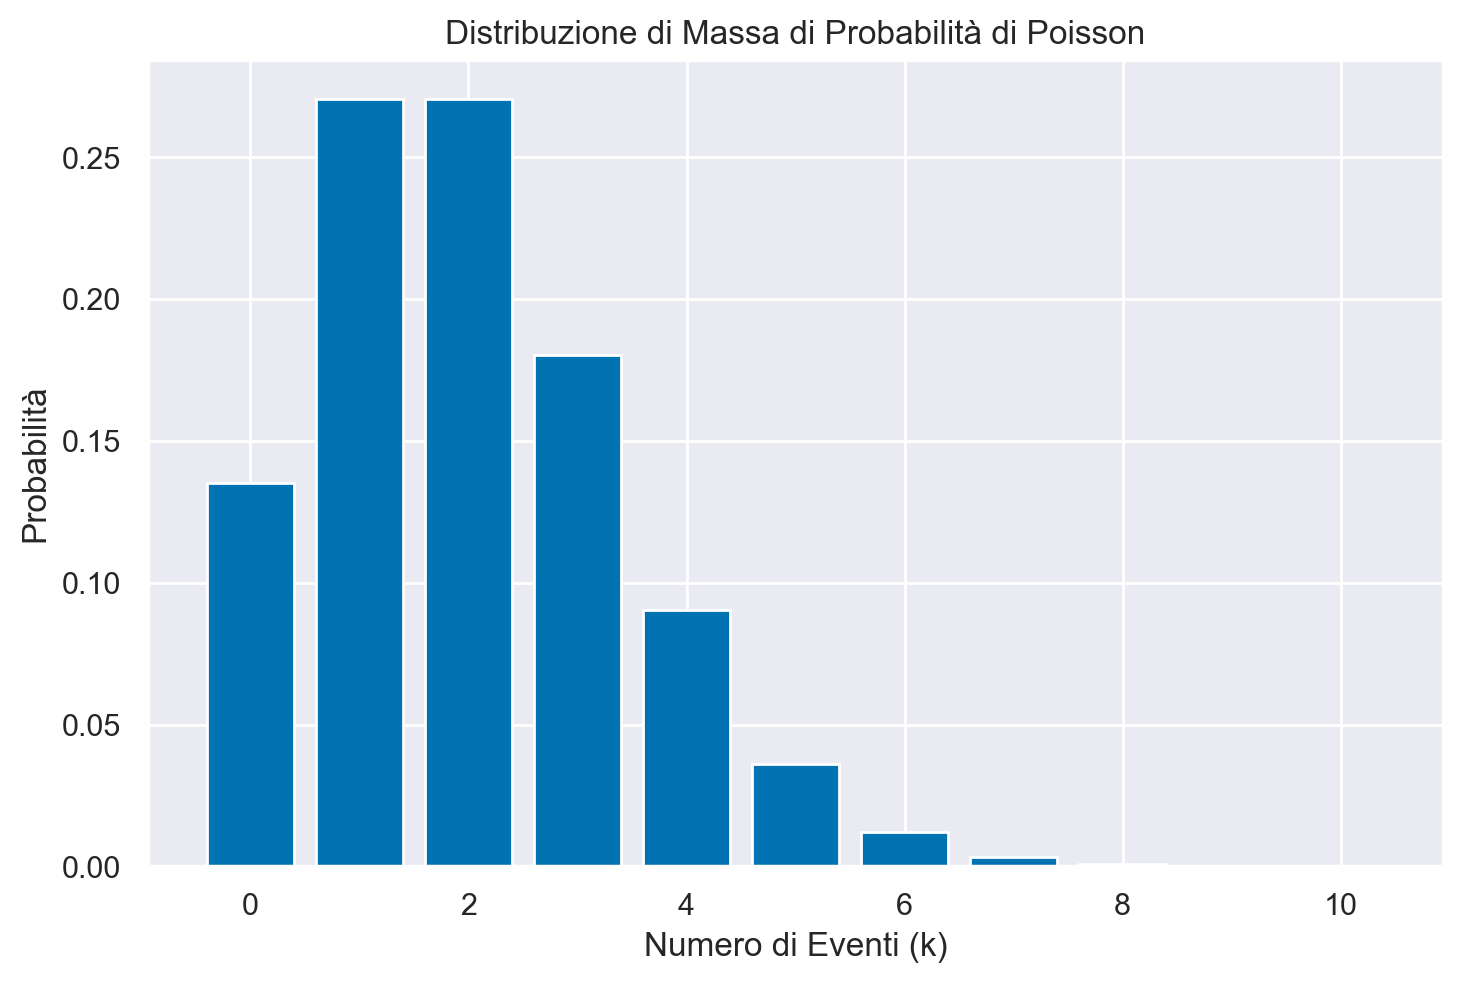

In [6]:
# Tasso medio di occorrenza di eventi
lambda_value = 2

# Creazione della distribuzione di Poisson con il tasso medio specificato
poisson_dist = stats.poisson(mu=lambda_value)

# Calcolo della probabilità di avere un certo numero di eventi
k_values = range(0, 11)  # Consideriamo valori da 0 a 10

# Calcolo delle probabilità corrispondenti
probabilities = poisson_dist.pmf(k_values)

plt.figure()

# Plot della distribuzione di massa di probabilità
plt.bar(k_values, probabilities)
plt.xlabel('Numero di Eventi (k)')
plt.ylabel('Probabilità')
plt.title('Distribuzione di Massa di Probabilità di Poisson')
plt.show()

La probabilità di un singolo valore $y$ si ottiene utilizzando la funzione `pmf`, in cui l'argomento `k` rappresenta il numero di eventi ($y$) e `mu` è uguale a $\lambda$. Ad esempio, la probabilità di osservare esattamente un evento ($y = 1$) dato un tasso di occorrenza $\lambda$ = 2, è data da:

In [31]:
stats.poisson.pmf(k=1, mu=2)

0.2706705664732254

La funzione `ppf`, che richiede come argomenti la probabilità e $\lambda$, restituisce il quantile della distribuzione di Poisson. Ad esempio, nel caso precedente abbiamo:

In [32]:
stats.poisson.ppf(0.2706705664732254, mu=2)

1.0

La funzione di ripartizione si ottiene utilizzando `cdf`. Per esempio:

In [42]:
stats.poisson.cdf(2, mu=2)

0.6766764161830634

Verifichiamo:

In [43]:
stats.poisson.pmf(0, mu=2) + stats.poisson.pmf(1, mu=2) + stats.poisson.pmf(2, mu=2)

0.6766764161830635

La generazione di numeri casuali dalla distribuzione di Poisson può essere ottenuta utilizzando `rng`. Ad esempio:

In [33]:
rng.poisson(2, 10)

array([4, 3, 3, 2, 1, 5, 2, 0, 1, 3])

Verifichiamo:

In [40]:
rng.poisson(2, 10000).mean()

1.9979

**Esempio.** I dati provenienti dal reparto di maternità di un certo ospedale mostrano che c'è una media storica di 4.5 bambini nati in questo ospedale ogni giorno. Qual è la probabilità che domani nascano 6 bambini in questo ospedale?

Per prima cosa, calcoliamo la probabilità teorica di questo evento utilizzando dpois(). Il numero di successi che stiamo considerando è 6, quindi imposteremo x = 6. Inoltre, questa media storica di 4,5 nascite al giorno è il nostro valore per lambda, quindi imposteremo lambda = 6.

In [9]:
from scipy.stats import poisson

# Numero di successi considerati
x = 6

# Valore medio storico di nascite al giorno (lambda) 
# Usiamo lmbda perché lambda è una parola chiave in Python
lmbda = 4.5

# Calcoliamo la probabilità utilizzando la distribuzione di Poisson
probabilita = poisson.pmf(x, lmbda)

print(f"La probabilità che saranno nati 6 bambini in questo ospedale domani è: {probabilita:.4f}")

La probabilità che saranno nati 6 bambini in questo ospedale domani è: 0.1281


Simuliamo le nascite in questo ospedale per un anno (n = 365) utilizzando la funzione `np.random.poisson` e confrontiamo la proporzione di giorni in cui ci sono stati 6 nascite con la probabilità teorica che abbiamo calcolato in precedenza. 

In [25]:
# Impostiamo il seed per la riproducibilità dei risultati
np.random.seed(2)

# Simuliamo le nascite in un anno (365 giorni) con una media storica di 4.5 nascite al giorno
n_days = 365
mean_births_per_day = 4.5
simulated_births = np.random.poisson(mean_births_per_day, n_days)

# Calcoliamo la proporzione di giorni in cui sono nati esattamente 6 bambini nella simulazione
proportion_six_births = np.mean(simulated_births == 6)

# Stampiamo la proporzione calcolata
print(f"La proporzione di giorni in cui sono nati 6 bambini nella simulazione è: {proportion_six_births:.4f}")

La proporzione di giorni in cui sono nati 6 bambini nella simulazione è: 0.1260


Visualizziamo i risultati della simulazione.

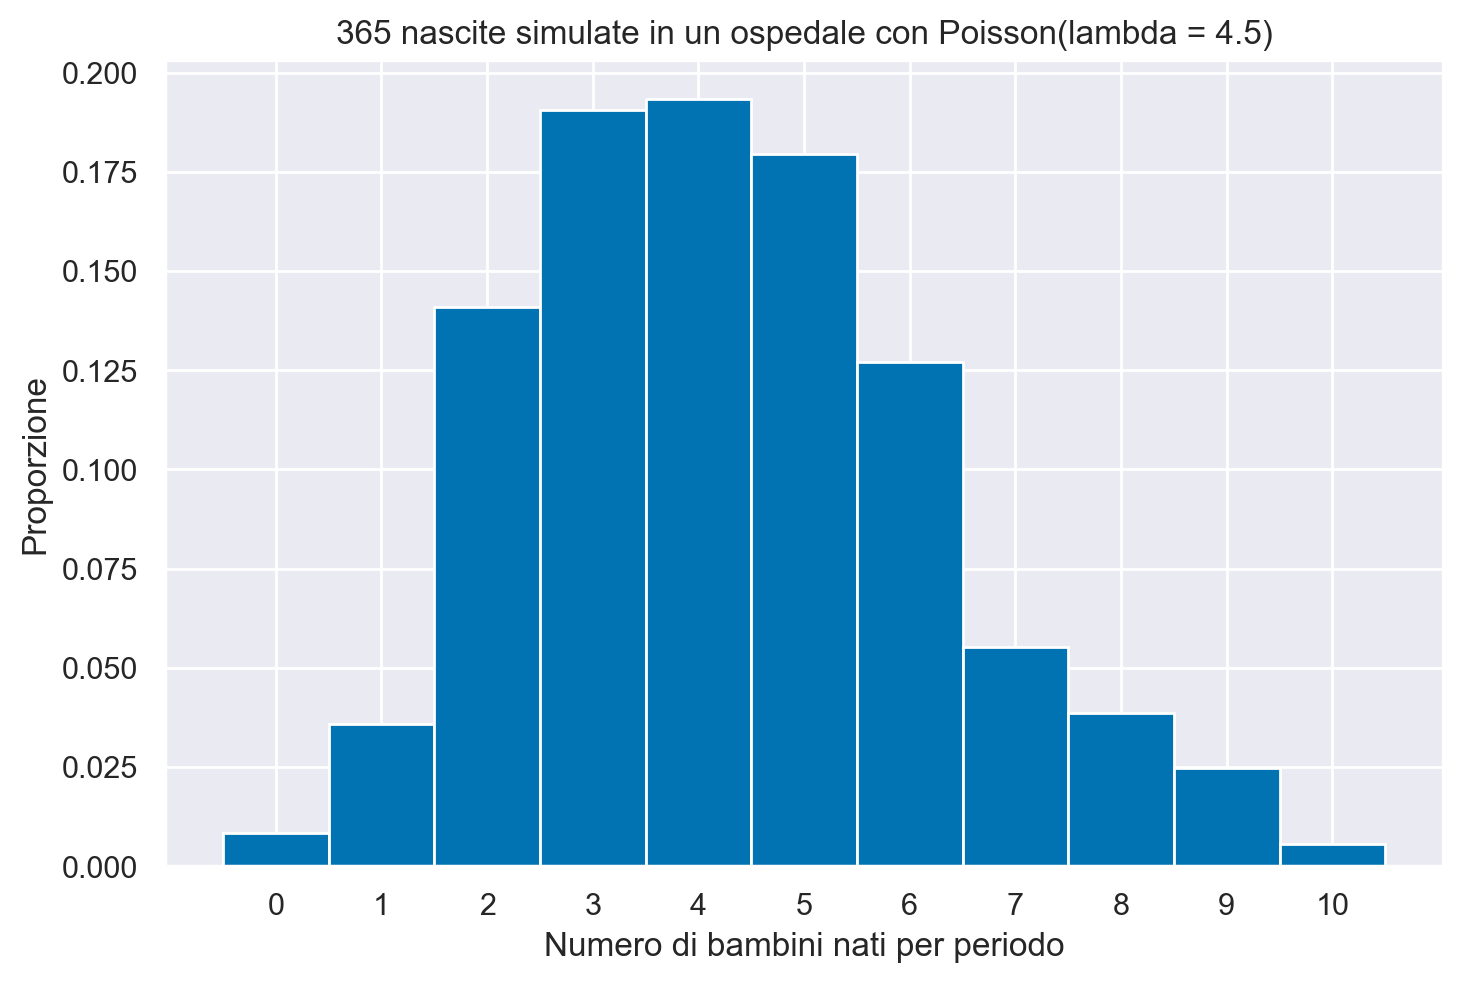

In [26]:
# Visualizziamo l'istogramma delle nascite simulate
plt.hist(simulated_births, bins=np.arange(12) - 0.5, density=True)
plt.xlabel('Numero di bambini nati per periodo')
plt.ylabel('Proporzione')
plt.title('365 nascite simulate in un ospedale con Poisson(lambda = 4.5)')
plt.xticks(np.arange(11));

Calcoliamo la probabilità teorica della nascita di più di 6 bambini in un giorno.

In [29]:
prob_more_than_six = 1 - poisson.cdf(6, mean_births_per_day)
print(f"La probabilità teorica di più di 6 bambini nati è: {prob_more_than_six:.4f}")

La probabilità teorica di più di 6 bambini nati è: 0.1689


Calcoliamo la proporzione corrispondente nella simulazione

In [30]:
proportion_more_than_six = np.mean(simulated_births > 6)
print(f"La proporzione di giorni con più di 6 bambini nati nella simulazione è: {proportion_more_than_six:.4f}")


La proporzione di giorni con più di 6 bambini nati nella simulazione è: 0.1315


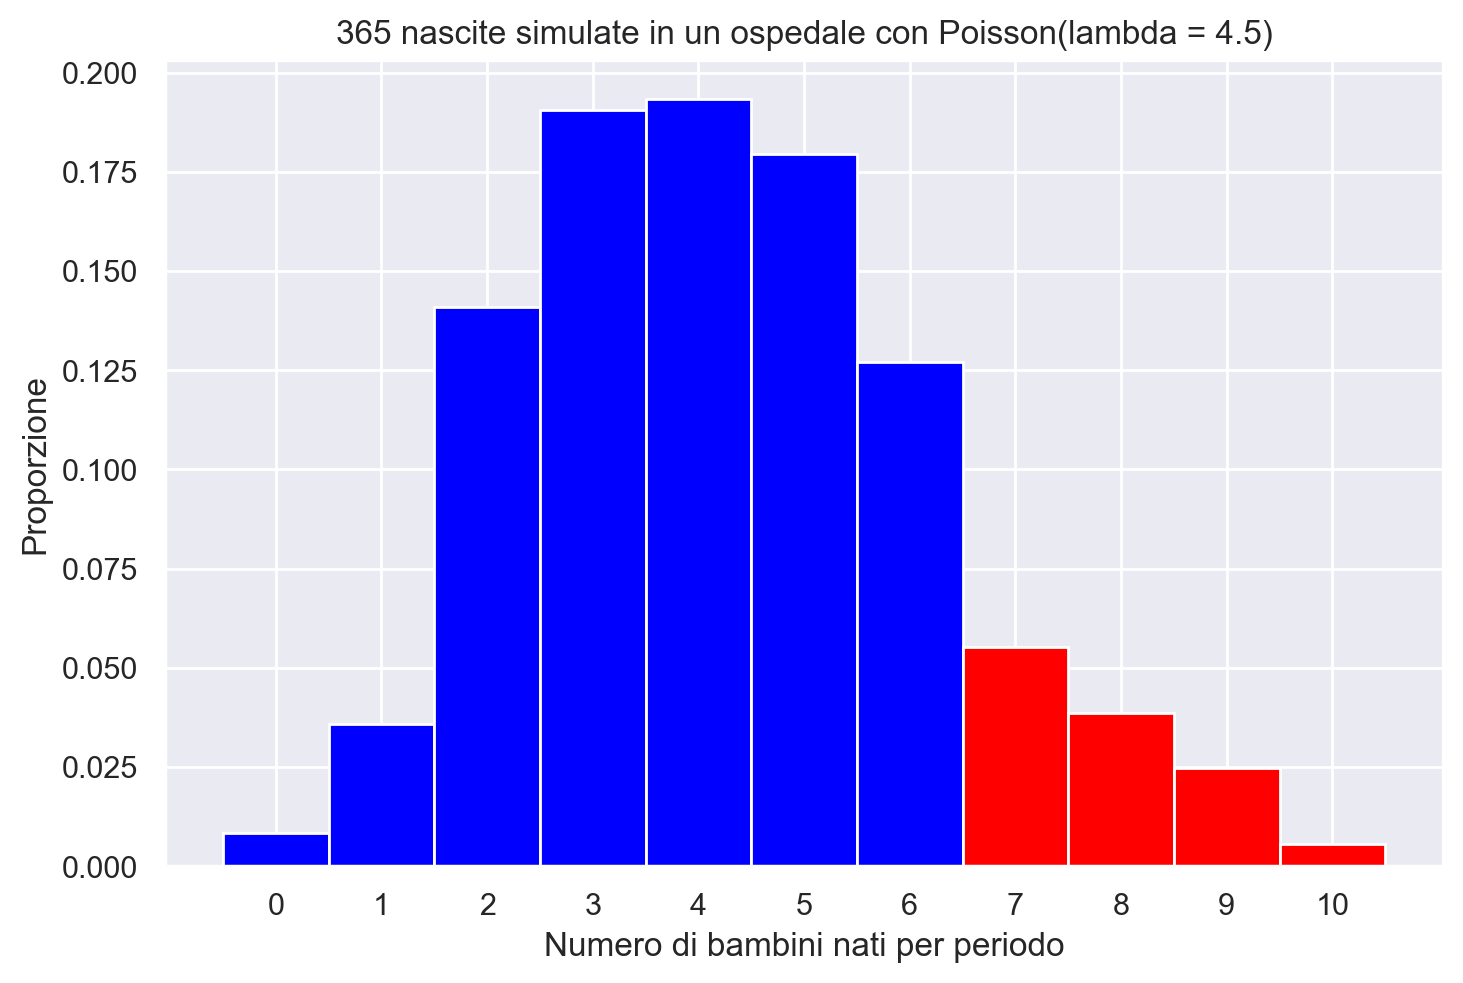

In [24]:
bins = np.arange(12) - 0.5
hist, edges = np.histogram(simulated_births, bins=bins, density=True)

# Disegna l'istogramma
for i in range(len(hist)):
    if edges[i] >= 6:
        color = 'red'  # Colore per x > 6
    else:
        color = 'blue'  # Colore per x <= 6
    plt.bar(edges[i], hist[i], width=1, align='edge', color=color)

# Imposta etichette e titolo
plt.xlabel('Numero di bambini nati per periodo')
plt.ylabel('Proporzione')
plt.title('365 nascite simulate in un ospedale con Poisson(lambda = 4.5)')
_ = plt.xticks(np.arange(11))

## Distribuzione Beta-Binomiale

La distribuzione beta-binomiale è una distribuzione di probabilità discreta estremamente utile in situazioni dove la probabilità di successo in una serie di esperimenti non è costante, ma varia seguendo una distribuzione beta. Questa distribuzione è parametrizzata da tre valori: $N$, $\alpha$ e $\beta$.

La formula che definisce la funzione di massa di probabilità della distribuzione beta-binomiale è la seguente:

$$
BetaBinomial(y \mid N, \alpha, \beta) = \binom{N}{y} \frac{B(y + \alpha, N-y+\beta)}{B(\alpha, \beta)},
$$ (eq-beta-binom-formula)

dove $y$ rappresenta il numero di successi osservati, $N$ è il numero totale di prove, e $\alpha$ e $\beta$ sono i parametri della distribuzione beta che modellano la variazione nella probabilità di successo tra le prove. La funzione beta, indicata come $B(u, v)$, è definita come:

$$
B(u, v) = \frac{\Gamma(u)\Gamma(v)}{\Gamma(u+v)},
$$

in cui $\Gamma$ rappresenta la funzione gamma, un'estensione del concetto di fattoriale a numeri reali e complessi.

Questa distribuzione è particolarmente utile in contesti dove le probabilità di successo variano in maniera casuale, ma seguendo una certa distribuzione, come può accadere in studi clinici o in ricerche comportamentali. La distribuzione beta-binomiale fornisce una modellazione più flessibile rispetto alla semplice distribuzione binomiale, adattandosi meglio a situazioni reali dove l'ipotesi di una probabilità di successo costante non è valida.

## Conclusioni sulle Distribuzioni Discrete

In questo capitolo, abbiamo esplorato diverse distribuzioni discrete fondamentali, ciascuna con le sue specifiche applicazioni e peculiarità. Abbiamo iniziato con la distribuzione Bernoulliana, che modella esperimenti con due possibili esiti, come il lancio di una moneta. Abbiamo poi approfondito la distribuzione Binomiale, una generalizzazione della Bernoulliana, che si focalizza sul conteggio del numero di successi in un dato numero di prove indipendenti.

Abbiamo anche esaminato la distribuzione Beta-Binomiale, che estende ulteriormente il modello Binomiale incorporando la variabilità nella probabilità di successo, e la distribuzione di Poisson, utilizzata per modellare il numero di eventi che si verificano in un intervallo di tempo o spazio, quando questi eventi sono rari e indipendenti.

Infine, abbiamo discusso la distribuzione Discreta Uniforme, che attribuisce la stessa probabilità a ogni evento in un insieme finito e discreto. Questa distribuzione è particolarmente utile quando non abbiamo ragioni per assegnare probabilità diverse ai diversi esiti.

Queste distribuzioni formano il cuore dell'analisi statistica discreta e trovano applicazione in un'ampia gamma di settori. In particolare, nel contesto dell'analisi bayesiana, la comprensione della distribuzione Binomiale e Beta-Binomiale è cruciale, poiché queste distribuzioni forniscono le basi per l'aggiornamento bayesiano, un concetto chiave che sarà esplorato nei capitoli successivi.

Per coloro interessati a tecniche più avanzate, la generazione di valori casuali a partire da queste distribuzioni è trattata nell'appendice {ref}`rng-appendix`. Questa sezione fornisce strumenti e approfondimenti utili per l'applicazione pratica di questi modelli probabilistici.

In conclusione, le distribuzioni discrete forniscono strumenti essenziali e versatili per modellare e analizzare fenomeni caratterizzati da eventi distinti e quantificabili. La comprensione approfondita di queste distribuzioni è cruciale per chiunque desideri esplorare il vasto campo della probabilità e della statistica. 

## Watermark

In [14]:
%load_ext watermark
%watermark -n -u -v -iv -w -p pytensor

Last updated: Mon Jan 22 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pytensor: 2.18.4

numpy     : 1.26.2
seaborn   : 0.13.0
arviz     : 0.17.0
scipy     : 1.11.4
pandas    : 2.1.4
matplotlib: 3.8.2

Watermark: 2.4.3

